# Setup

In [1]:
import numpy.random as rnp
import numpy as np
import matplotlib.pyplot as plt
rnp.seed(35287)

In [2]:
w = 5
l = 9
d = 36
N = 10000

In [3]:
u1, u2, u3, u4 = rnp.rand(4,N)
theta = u1*np.pi-np.pi/2
phi = u2*2*np.pi
alpha = np.ones(N)*np.deg2rad(30)

In [4]:
ray = np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
ntop = np.array([np.zeros(N),np.sin(alpha),np.cos(alpha)])

In [5]:
foreshorten = np.multiply(ray.transpose(),ntop.transpose()).sum(axis=1)

In [6]:
def invtran(y):
    return y + (1/3) * y**3 + (4/15) * y**5 + (86/315) * y**7


# ok so problem is how we are finding the inverse
# the bisection method is not working for u vertical shifts
# that have muliple roots too near each other so... it like doesn't show them
# and the tyalor series one... it goes bad too fast, we need more degrees or
# a different approximation
# I think we should do lagrange polynomial for the x/2 + sin(2x)/2 and then get 
# the inverse of that polynomail.

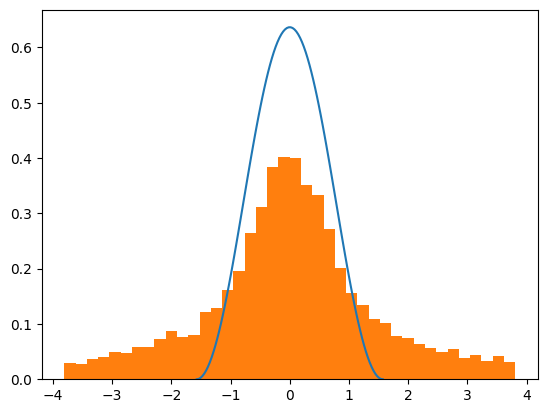

In [19]:
plt.figure()
x=np.linspace(-np.pi/2,np.pi/2,100)
plt.plot(x,np.cos(x)**2*2/np.pi,label="cos")
u5 = (rnp.rand(10000)-0.5)*np.pi/2
plt.hist(invtran(u5*np.pi/2),bins=40, density=True)
plt.show()

In [16]:
invtran(max(u5))

np.float64(1.076690044065245)

In [8]:
def bisection(func, a, b, iter):
    m = 0
    for _ in range(iter):
        m = 0.5*(a+b)
        fm = func(m)
        if fm*func(a)>0:
            a=m
        else:
            b=m
    return m

In [9]:
def func(x):
    x= np.asarray(x)
    return x/2 +np.sin(2*x)/2

In [10]:
bounds= np.pi/2
k = np.zeros_like(u3)
for i,u in enumerate((u3-0.5)*(bounds)):
    k[i]=bisection(lambda p: func(p)-u,-2*bounds,2*bounds,70)

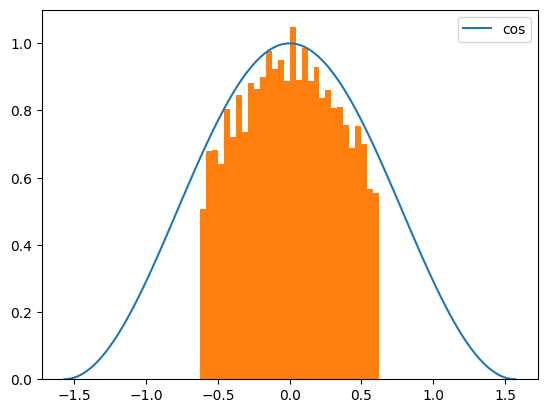

In [11]:
plt.figure()
x4=np.linspace(0,np.pi,100)-np.pi/2
plt.plot(x4,(np.cos(x4)**2),label="cos")
plt.hist(k,bins=30,density=True)
plt.legend()

plt.show()

In [ ]:
plt.figure()
plt.plot()

In [81]:
x = (rnp.rand(50)-0.5)*np.pi/2
u = func(x)
k = []
for i in u:
    k.append(bisection(lambda p: func(p)-i,-np.pi/2+0.3,np.pi/2+0.3,70))


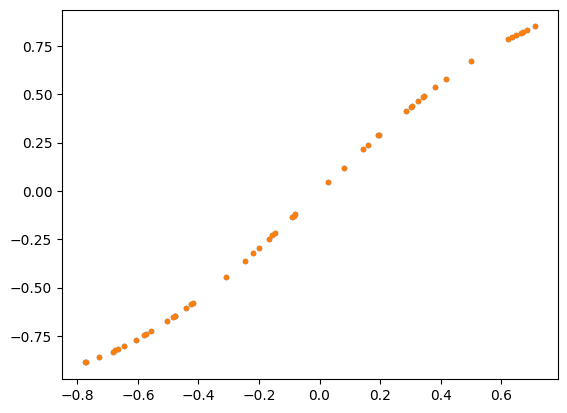

In [82]:
plt.figure()
plt.plot(x,func(x),marker=".",linestyle="")
plt.plot(k,u,marker=".",linestyle="")
plt.show()

(array([7., 7., 4., 4., 6., 2., 4., 7., 2., 7.]),
 array([-0.77623291, -0.62728797, -0.47834303, -0.3293981 , -0.18045316,
        -0.03150822,  0.11743672,  0.26638166,  0.4153266 ,  0.56427154,
         0.71321648]),
 <BarContainer object of 10 artists>)

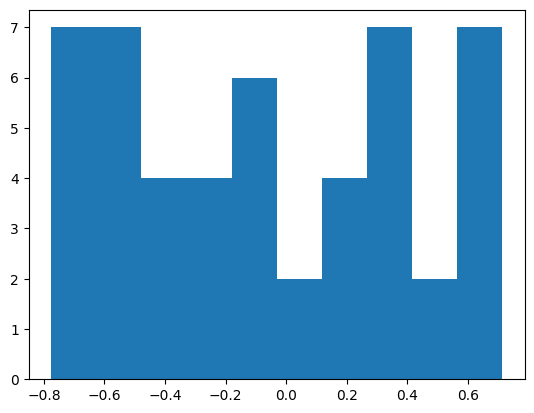

In [84]:
plt.hist(k)